## Board Slides for FoodWheel
***

## Project Requirements

1. Before we begin analyzing our data, we need to import two Python packages. To be able to load in and inspect our datasets, we must first import the pandas package. We will also need to create visualizations to help us analyze the data. This requires us to import pyplot, a subset of the Matplotlib package. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Cuisine Offerings

2. Now that we have imported the pandas package, we can begin looking at our data. Load and inspect the restaurant data from `restaurants.csv` into a DataFrame called `restaurants`.

In [3]:
restaurants = pd.read_csv('restaurants.csv')
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


3. Now that we have our data loaded in and inspected, we can start to ask some questions about the data. Suppose we wanted to know how many different types of cuisine FoodWheel offers and how many different restaurants serve that type of cuisine. Print out your answers to both questions.

In [4]:
cuisine_count = restaurants['cuisine'].nunique()
print(f"Cuisine count: {cuisine_count}")

Cuisine count: 7


In [5]:
cuisine_count_df = restaurants.groupby('cuisine')['id'].count().reset_index()
cuisine_count_df

,cuisine,id
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetarian,4


4. The board wants to make sure that FoodWheel offers a wide variety of restaurants. Having many different options makes customers more likely to come back. Create a pie chart that shows the different types of cuisines available on FoodWheel.

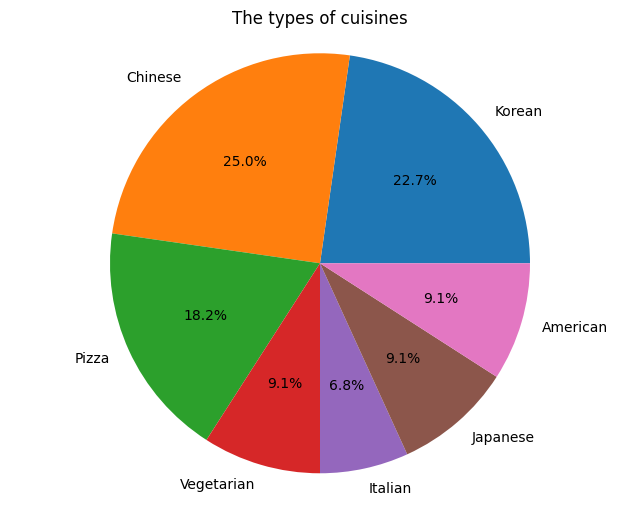

In [6]:
cuisines_list = restaurants['cuisine'].unique().tolist()

plt.figure(figsize=(8,6))
plt.pie(cuisine_count_df['id'], labels=cuisines_list, autopct='%1.1f%%')
plt.axis('equal')
plt.title('The types of cuisines')
plt.show()

## Order Price Over Time

5. FoodWheel is a relatively new start-up.  They launched one year ago and have grown more popular since then.  Management suspects that the average amount spent on each order has increased over time. To investigate this, load in the order data from `orders.csv` into a DataFrame called `orders`. Inspect the first few rows of the DataFrame.

In [7]:
orders = pd.read_csv('orders.csv')
orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


6. Perhaps tracking the orders made per month can help us determine a trend. Group the `orders` data by month.

In [8]:
orders['month'] = orders['date'].apply(lambda x: x.split('-')[0])
orders.head()

,id,customer_id,date,price,month
0,1,61,6-18-2017,13.0,6
1,2,210,5-8-2017,21.0,5
2,3,0,9-7-2017,33.0,9
3,4,66,7-7-2017,19.0,7
4,5,65,4-26-2017,13.0,4


7. While we are interested in the average order amount spent each month (average price), it wouldn't hurt to include the standard deviation as well. Calculate the average and standard deviation of the amount spent per month (`price`) and store each as its own separate variable.

In [23]:
avg_order = orders.groupby('month')['price'].mean().round(2).reset_index()
print(avg_order)
print()
std_order = orders.groupby('month')['price'].std().round(2).reset_index()
print(std_order)

  month  price
0     4   9.61
1     5  14.86
2     6  15.15
3     7  18.01
4     8  21.15
5     9  29.51

  month  price
0     4   2.56
1     5   3.40
2     6   2.84
3     7   2.85
4     8   4.46
5     9   4.52


8. At last, we can now visualize our data. Create a bar plot that demonstrates the trend in average order size over time. Make sure to include the following information:

     -The height of each bar should come from the `price` field from your DataFrame in step 7 (`avg_order`).
     
     -Use the standard deviations from step 7 (`std_order`) as the `yerr`.
     
     -The error capsize should be 5.
     
     -Make sure that you label each bar with the name of the month (i.e., 4 = April).
     
     -Also be sure to label the y-axis.
     
     -Give your plot a descriptive title.

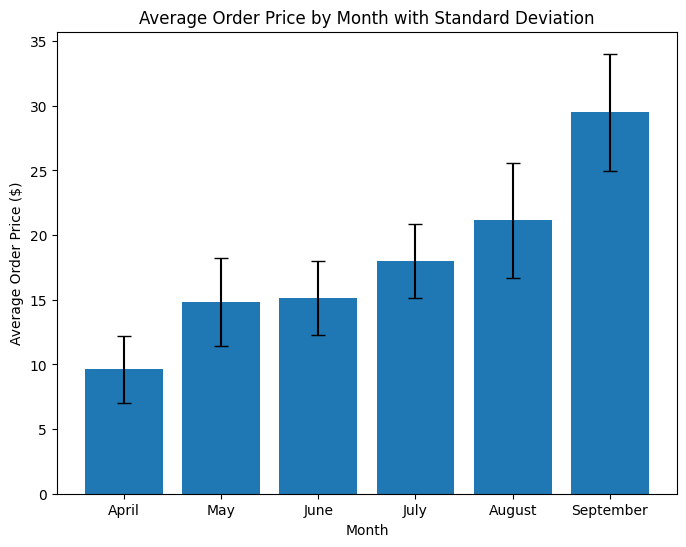

In [ ]:
months = ['April', 'May', 'June', 'July', 'August', 'September']

plt.figure(figsize=(8,6))
plt.bar(avg_order['month'], avg_order['price'], yerr=std_order['price'], capsize=5)
plt.xlabel('Month')
plt.xticks(avg_order['month'], months)
plt.ylabel('Average Order Price ($)')
plt.title('Average Order Price by Month with Standard Deviation')
plt.show()

## Customer Orders

9. There is a range of amounts that customers spend at FoodWheel. Create a `customer_amount` DataFrame that stores each customer and how much they order.

    **Hint:**
    
    Start by grouping `orders` by `customer_id` and calculating the total amount spent by each customer.  Save your results to `customer_amount`.


In [33]:
customer_amount = orders.groupby('customer_id')['price'].sum().reset_index()
print(customer_amount.head())
print(customer_amount.shape)

   customer_id  price
0            0   83.0
1            2   11.0
2            3   65.0
3            4   32.0
4            5  119.0
(224, 2)


10. Create a histogram of the amount spent by each customer over the past six months with the following format:

     -The range should be from 0 to 200
     
     -The number of bins should be 40
     
     -Label the x-axis `Total Spent`
     
     -Label the y-axis `Number of Customers`
     
     -Add a title

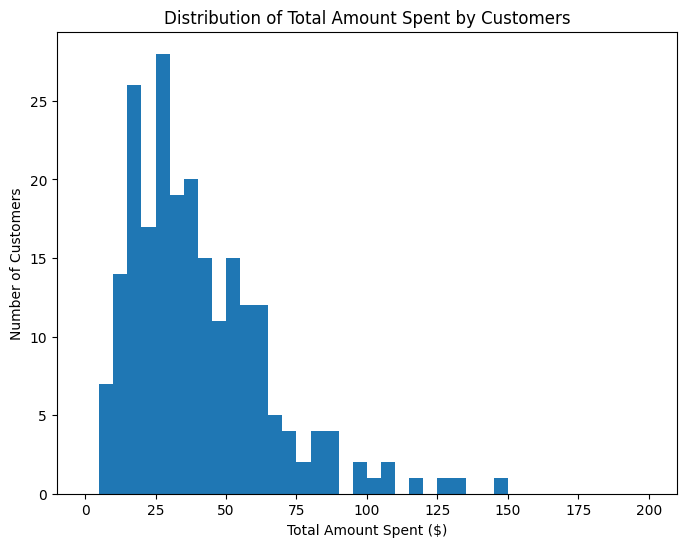

In [36]:
plt.figure(figsize=(8,6))
plt.hist(customer_amount['price'], bins=40, range=(0, 200))
plt.xlabel('Total Amount Spent ($)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Amount Spent by Customers')
plt.show()

### Congratulations!! 

The team loves your analysis, and plan to use the information you have gathered to make beneficial decisions for the company and community. There is an additional task of adding the links for each of the paintings to the main list. This task can be considered a challenge that does not need to be completed to move on to the next section.

### Extra Challenge

After a great round of applause, a member of the senior leadership board would quickly like to see the neighborhoods that have the most restaurants. 

Create a visualization to display the restaurant count for each neighborhood.

**Hint:**

View the unique neighborhoods.

Calculate the value counts of the neighborhood variable.

Create a list of the neighborhood count values.